In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import *
from tkinter import ttk
from tkinter import messagebox as ms
from PIL import ImageTk, Image
import librosa

In [2]:
df = pd.read_csv('Emotion_features.csv')
df.head()

,id,song_name,Class,label,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,1,30 seconds to Mars - Night of the Hunter.mp3,relax,3,117.453835,139925,1283.715596,0.422269,0.293326,0.086040,...,0.007792,0.000001,0.131658,0.017334,0.000142,0.095362,0.009094,4.221388,1.601396,2.564469
1,2,Absolutely - Story of A Girl.mp3,sad,1,129.199219,159877,1268.865079,0.425321,0.289704,0.083929,...,0.008534,-0.000003,0.169204,0.028630,0.000006,0.099145,0.009830,3.246150,1.885735,3.555996
2,3,Ace - Futureland.mp3,happy,2,99.384014,121594,1253.546392,0.487377,0.268670,0.072184,...,0.006199,0.000019,0.206916,0.042814,-0.000077,0.115425,0.013323,3.989188,1.766115,3.119163
3,4,Alan Walker - Faded.mp3,sad,1,89.102909,113611,1291.034091,0.292934,0.295695,0.087435,...,0.002483,-0.000020,0.184177,0.033921,-0.000003,0.055471,0.003077,3.423782,1.922333,3.695364
4,5,Alan Walker - Force [Instrumental].mp3,relax,3,198.768029,252770,1404.277778,0.286669,0.300049,0.090029,...,0.002977,0.000014,0.147811,0.021848,0.000307,0.048204,0.002324,9.637442,7.344525,53.942050


In [3]:
df.var()

id                     4.750000e+02
label                  1.252252e+00
tempo                  6.429966e+02
total_beats            1.174380e+09
average_beats          7.242264e+03
chroma_stft_mean       4.635922e-03
chroma_stft_std        1.433960e-04
chroma_stft_var        4.822500e-05
chroma_cq_mean         3.949027e-03
chroma_cq_std          1.782507e-04
chroma_cq_var          5.499776e-05
chroma_cens_mean       2.839357e-04
chroma_cens_std        7.582088e-04
chroma_cens_var        6.660318e-05
melspectrogram_mean    4.743122e+01
melspectrogram_std     2.172758e+03
melspectrogram_var     8.702103e+07
mfcc_mean              2.614422e+01
mfcc_std               1.574034e+02
mfcc_var               1.496832e+06
mfcc_delta_mean        1.406230e-05
mfcc_delta_std         4.333712e-01
mfcc_delta_var         1.251854e+01
rmse_mean              4.280608e+00
rmse_std               7.591379e-01
rmse_var               1.753173e+01
cent_mean              2.633936e+05
cent_std               3.608

In [4]:
x = df.drop(['id','song_name','Class','label'],axis = 1)
y = df.Class

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols = x.columns
x= pd.DataFrame(ss.fit_transform(x))
x.columns = cols
x.head()

,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,chroma_cq_var,chroma_cens_mean,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,-0.036224,-0.071125,0.255215,0.371779,0.092343,0.072729,0.757382,-1.194507,-1.189268,0.733868,...,1.339158,-0.114061,-0.404010,-0.561300,0.038723,0.044723,-0.166283,-0.022486,-0.394784,-0.343831
1,0.430089,0.515009,0.079536,0.416897,-0.212109,-0.233356,0.126699,-0.234260,-0.257796,0.615674,...,1.602554,-0.114608,0.300166,0.144843,-0.057078,0.132599,-0.084130,-0.377803,-0.214821,-0.274016
2,-0.753629,-0.609638,-0.101681,1.334449,-1.980449,-1.935999,-0.640287,1.858258,1.924530,-0.662274,...,0.774550,-0.111888,1.007464,1.031534,-0.115060,0.510855,0.305967,-0.107086,-0.290530,-0.304774
3,-1.161808,-0.844156,0.341791,-1.540549,0.291522,0.275033,-1.182138,0.701559,0.692344,-1.353202,...,-0.543412,-0.116776,0.581000,0.475622,-0.063272,-0.882112,-0.838208,-0.313084,-0.191658,-0.264203
4,3.192098,3.243947,1.681442,-1.633183,0.657558,0.651058,-1.724256,0.846097,0.842821,-1.910981,...,-0.368353,-0.112477,-0.101063,-0.279108,0.154542,-1.050957,-0.922344,1.950788,3.240131,3.273719


# Decision Tree Classifier

In [39]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,stratify = y)
model = tree.DecisionTreeClassifier()
param_grid = {'criterion': ['gini','entropy']}
dt = model.fit(xtrain,ytrain)
dtree_cv = GridSearchCV(model,param_grid,cv= 8)
dtree_cv.fit(xtrain,ytrain)
dtree_ypred = dtree_cv.predict(x)

In [40]:
print('Testing Accuracy is ',dtree_cv.score(x,y)*100,'%')
pd.crosstab(y,dtree_ypred, rownames=['True'], colnames=['Predicted'], margins=True)

Testing Accuracy is  93.33333333333333 %


Predicted,angry,happy,relax,sad,All
True,,,,,
angry,15,0,1,0,16
happy,0,23,2,0,25
relax,0,1,9,1,11
sad,0,0,0,23,23
All,15,24,12,24,75


In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y,dtree_ypred)

Text(33,0.5,'truth')

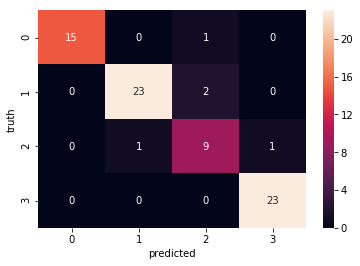

In [42]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

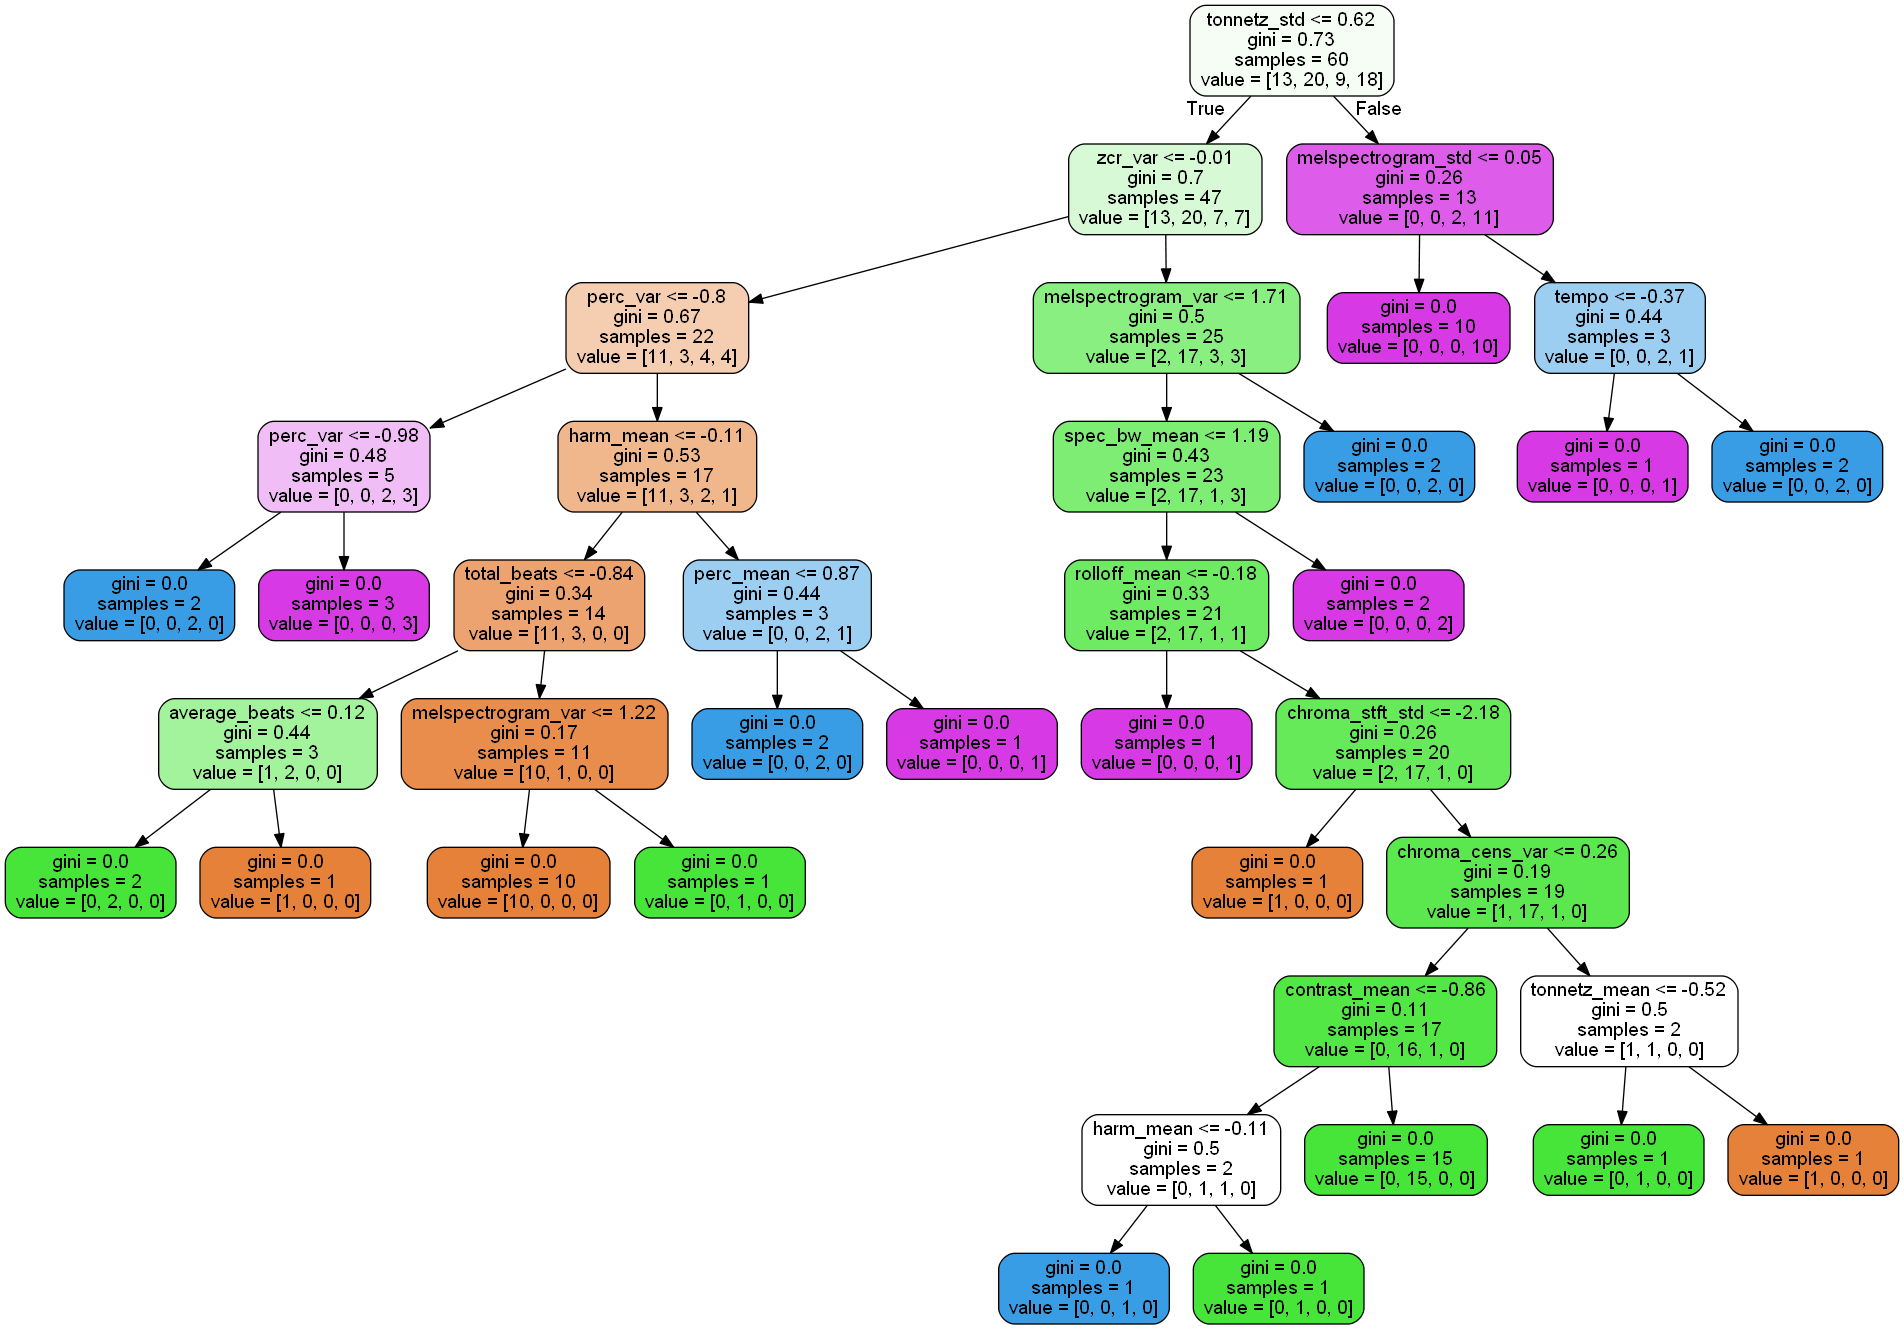

In [43]:
dot_data = tree.export_graphviz(dt, out_file=None,feature_names = cols,rounded = True, proportion = False, precision = 2, filled = True)
import pydotplus
from IPython.display import Image
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# K Nearest Neighbors


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
data = pd.read_csv('Emotion_features.csv')
X = data.loc[:, 'tempo':]
y = data['Class']
featureName = list(X)
for name in featureName:
    X[name] = (X[name]-X[name].min())/(X[name].max()-X[name].min())

In [46]:
knn = KNeighborsClassifier()
param_grid = { 'n_neighbors': np.arange(1, 25) }
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
print(knn_cv.best_params_)

{'n_neighbors': 13}


In [49]:
knn = KNeighborsClassifier(13)
knn_cv = knn.fit(X,y)

In [50]:
knn_Y_pred = knn_cv.predict(X)
pd.crosstab(y, knn_Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,angry,happy,sad,All
True,,,,
angry,11,4,1,16
happy,3,22,0,25
relax,2,5,4,11
sad,2,3,18,23
All,18,34,23,75


In [51]:
print("Accuracy Score is: ",accuracy_score(y, knn_Y_pred)*100,'%')

Accuracy Score is:  68.0 %


# Random Forest Classifier

In [52]:
df = pd.read_csv('Emotion_features.csv')
x = df.drop(['id','song_name','Class','label'],axis = 1)
y = df.Class
cols = x.columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x= pd.DataFrame(ss.fit_transform(x))
x.columns = cols

In [74]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 16)
param = {'n_estimators':np.arange(1,20)}
rmodel_cv = GridSearchCV(model1,param,cv=10)
rmodel_cv.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
rmodel_cv.best_params_

{'n_estimators': 9}

In [76]:
rmodel_cv.best_score_

0.5866666666666667

In [77]:
model1 = RandomForestClassifier(n_estimators = 19)
rmodel = model1.fit(x,y)
ry_pred = rmodel.predict(x)

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y,ry_pred)

Text(33,0.5,'truth')

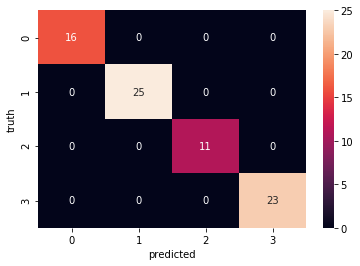

In [79]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [80]:
rY_pred = rmodel_cv.predict(x)
pd.crosstab(y, rY_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,angry,happy,relax,sad,All
True,,,,,
angry,15,1,0,0,16
happy,1,24,0,0,25
relax,0,0,10,1,11
sad,0,1,0,22,23
All,16,26,10,23,75


In [81]:
from sklearn import metrics 
print("Accuracy Score is: ",metrics.accuracy_score(y, rY_pred)*100,'%')

Accuracy Score is:  94.66666666666667 %


# Gaussian Naive Bayes Classifier

In [82]:
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df=pd.read_csv("Emotion_features.csv")

In [84]:
x = df.drop(['id','song_name','Class','label'],axis = 1)
X = x
y = df.Class

In [85]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb=gnb.fit(x, y) 

In [86]:
gnby_pred = gnb.predict(x) 

In [87]:
pd.crosstab(y, gnby_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,angry,happy,relax,sad,All
True,,,,,
angry,5,7,0,4,16
happy,3,20,1,1,25
relax,0,4,4,3,11
sad,1,6,2,14,23
All,9,37,7,22,75


In [88]:
print("Accuracy Score is:",metrics.accuracy_score(y, gnby_pred)*100)


Accuracy Score is: 57.333333333333336


# GUI Music Emotion Recognition

In [100]:
class design:
    def __init__(self,master):
        self.master=master
        self.filedir = StringVar()
        self.pred_val = str()
        self.imgframe = None
        self.downframe = None
    def extract_feature(self,songname):
        feature_set = pd.DataFrame()  # Feature Matrix
    
    # Individual Feature Vectors
        id=1
        tempo_vector = pd.Series()
        total_beats = pd.Series()
        average_beats = pd.Series()
        chroma_stft_mean = pd.Series()
        chroma_stft_std = pd.Series()
        chroma_stft_var = pd.Series()
        chroma_cq_mean = pd.Series()
        chroma_cq_std = pd.Series()
        chroma_cq_var = pd.Series()
        chroma_cens_mean = pd.Series()
        chroma_cens_std = pd.Series()
        chroma_cens_var = pd.Series()
        mel_mean = pd.Series()
        mel_std = pd.Series()
        mel_var = pd.Series()
        mfcc_mean = pd.Series()
        mfcc_std = pd.Series()
        mfcc_var = pd.Series()
        mfcc_delta_mean = pd.Series()
        mfcc_delta_std = pd.Series()
        mfcc_delta_var = pd.Series()
        rmse_mean = pd.Series()
        rmse_std = pd.Series()
        rmse_var = pd.Series()
        cent_mean = pd.Series()
        cent_std = pd.Series()
        cent_var = pd.Series()
        spec_bw_mean = pd.Series()
        spec_bw_std = pd.Series()
        spec_bw_var = pd.Series()
        contrast_mean = pd.Series()
        contrast_std = pd.Series()
        contrast_var = pd.Series()
        rolloff_mean = pd.Series()
        rolloff_std = pd.Series()
        rolloff_var = pd.Series()
        poly_mean = pd.Series()
        poly_std = pd.Series()
        poly_var = pd.Series()
        tonnetz_mean = pd.Series()
        tonnetz_std = pd.Series()
        tonnetz_var = pd.Series()
        zcr_mean = pd.Series()
        zcr_std = pd.Series()
        zcr_var = pd.Series()
        harm_mean = pd.Series()
        harm_std = pd.Series()
        harm_var = pd.Series()
        perc_mean = pd.Series()
        perc_std = pd.Series()
        perc_var = pd.Series()
        frame_mean = pd.Series()
        frame_std = pd.Series()
        frame_var = pd.Series()


        y, sr = librosa.load(songname, duration=60)
        S = np.abs(librosa.stft(y))
        
        # Extracting Features
        tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
        chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
        melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        rmse = librosa.feature.rmse(y=y)
        cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        poly_features = librosa.feature.poly_features(S=S, sr=sr)
        tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        harmonic = librosa.effects.harmonic(y)
        percussive = librosa.effects.percussive(y)
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        mfcc_delta = librosa.feature.delta(mfcc)
    
        onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
        frames_to_time = librosa.frames_to_time(onset_frames[:20], sr=sr)
        
        # Transforming Features  # song name
        tempo_vector.set_value(id, tempo)  # tempo
        total_beats.set_value(id, sum(beats))  # beats
        average_beats.set_value(id, np.average(beats))
        chroma_stft_mean.set_value(id, np.mean(chroma_stft))  # chroma stft
        chroma_stft_std.set_value(id, np.std(chroma_stft))
        chroma_stft_var.set_value(id, np.var(chroma_stft))
        chroma_cq_mean.set_value(id, np.mean(chroma_cq))  # chroma cq
        chroma_cq_std.set_value(id, np.std(chroma_cq))
        chroma_cq_var.set_value(id, np.var(chroma_cq))
        chroma_cens_mean.set_value(id, np.mean(chroma_cens))  # chroma cens
        chroma_cens_std.set_value(id, np.std(chroma_cens))
        chroma_cens_var.set_value(id, np.var(chroma_cens))
        mel_mean.set_value(id, np.mean(melspectrogram))  # melspectrogram
        mel_std.set_value(id, np.std(melspectrogram))
        mel_var.set_value(id, np.var(melspectrogram))
        mfcc_mean.set_value(id, np.mean(mfcc))  # mfcc
        mfcc_std.set_value(id, np.std(mfcc))
        mfcc_var.set_value(id, np.var(mfcc))
        mfcc_delta_mean.set_value(id, np.mean(mfcc_delta))  # mfcc delta
        mfcc_delta_std.set_value(id, np.std(mfcc_delta))
        mfcc_delta_var.set_value(id, np.var(mfcc_delta))
        rmse_mean.set_value(id, np.mean(rmse))  # rmse
        rmse_std.set_value(id, np.std(rmse))
        rmse_var.set_value(id, np.var(rmse))
        cent_mean.set_value(id, np.mean(cent))  # cent
        cent_std.set_value(id, np.std(cent))
        cent_var.set_value(id, np.var(cent))
        spec_bw_mean.set_value(id, np.mean(spec_bw))  # spectral bandwidth
        spec_bw_std.set_value(id, np.std(spec_bw))
        spec_bw_var.set_value(id, np.var(spec_bw))
        contrast_mean.set_value(id, np.mean(contrast))  # contrast
        contrast_std.set_value(id, np.std(contrast))
        contrast_var.set_value(id, np.var(contrast))
        rolloff_mean.set_value(id, np.mean(rolloff))  # rolloff
        rolloff_std.set_value(id, np.std(rolloff))
        rolloff_var.set_value(id, np.var(rolloff))
        poly_mean.set_value(id, np.mean(poly_features))  # poly features
        poly_std.set_value(id, np.std(poly_features))
        poly_var.set_value(id, np.var(poly_features))
        tonnetz_mean.set_value(id, np.mean(tonnetz))  # tonnetz
        tonnetz_std.set_value(id, np.std(tonnetz))
        tonnetz_var.set_value(id, np.var(tonnetz))
        zcr_mean.set_value(id, np.mean(zcr))  # zero crossing rate
        zcr_std.set_value(id, np.std(zcr))
        zcr_var.set_value(id, np.var(zcr))
        harm_mean.set_value(id, np.mean(harmonic))  # harmonic
        harm_std.set_value(id, np.std(harmonic))
        harm_var.set_value(id, np.var(harmonic))
        perc_mean.set_value(id, np.mean(percussive))  # percussive
        perc_std.set_value(id, np.std(percussive))
        perc_var.set_value(id, np.var(percussive))
        frame_mean.set_value(id, np.mean(frames_to_time))  # frames
        frame_std.set_value(id, np.std(frames_to_time))
        frame_var.set_value(id, np.var(frames_to_time))
       
    # Concatenating Features into one csv and json format
 # song name
        feature_set['tempo'] = tempo_vector  # tempo 
        feature_set['total_beats'] = total_beats  # beats
        feature_set['average_beats'] = average_beats
        feature_set['chroma_stft_mean'] = chroma_stft_mean  # chroma stft
        feature_set['chroma_stft_std'] = chroma_stft_std
        feature_set['chroma_stft_var'] = chroma_stft_var
        feature_set['chroma_cq_mean'] = chroma_cq_mean  # chroma cq
        feature_set['chroma_cq_std'] = chroma_cq_std
        feature_set['chroma_cq_var'] = chroma_cq_var
        feature_set['chroma_cens_mean'] = chroma_cens_mean  # chroma cens
        feature_set['chroma_cens_std'] = chroma_cens_std
        feature_set['chroma_cens_var'] = chroma_cens_var
        feature_set['melspectrogram_mean'] = mel_mean  # melspectrogram
        feature_set['melspectrogram_std'] = mel_std
        feature_set['melspectrogram_var'] = mel_var
        feature_set['mfcc_mean'] = mfcc_mean  # mfcc
        feature_set['mfcc_std'] = mfcc_std
        feature_set['mfcc_var'] = mfcc_var
        feature_set['mfcc_delta_mean'] = mfcc_delta_mean  # mfcc delta
        feature_set['mfcc_delta_std'] = mfcc_delta_std
        feature_set['mfcc_delta_var'] = mfcc_delta_var
        feature_set['rmse_mean'] = rmse_mean  # rmse
        feature_set['rmse_std'] = rmse_std
        feature_set['rmse_var'] = rmse_var
        feature_set['cent_mean'] = cent_mean  # cent
        feature_set['cent_std'] = cent_std
        feature_set['cent_var'] = cent_var
        feature_set['spec_bw_mean'] = spec_bw_mean  # spectral bandwidth
        feature_set['spec_bw_std'] = spec_bw_std
        feature_set['spec_bw_var'] = spec_bw_var
        feature_set['contrast_mean'] = contrast_mean  # contrast
        feature_set['contrast_std'] = contrast_std
        feature_set['contrast_var'] = contrast_var
        feature_set['rolloff_mean'] = rolloff_mean  # rolloff
        feature_set['rolloff_std'] = rolloff_std
        feature_set['rolloff_var'] = rolloff_var
        feature_set['poly_mean'] = poly_mean  # poly features
        feature_set['poly_std'] = poly_std
        feature_set['poly_var'] = poly_var
        feature_set['tonnetz_mean'] = tonnetz_mean  # tonnetz
        feature_set['tonnetz_std'] = tonnetz_std
        feature_set['tonnetz_var'] = tonnetz_var
        feature_set['zcr_mean'] = zcr_mean  # zero crossing rate
        feature_set['zcr_std'] = zcr_std
        feature_set['zcr_var'] = zcr_var
        feature_set['harm_mean'] = harm_mean  # harmonic
        feature_set['harm_std'] = harm_std
        feature_set['harm_var'] = harm_var
        feature_set['perc_mean'] = perc_mean  # percussive
        feature_set['perc_std'] = perc_std
        feature_set['perc_var'] = perc_var
        feature_set['frame_mean'] = frame_mean  # frames
        feature_set['frame_std'] = frame_std
        feature_set['frame_var'] = frame_var
        return(feature_set)
        
    def browse_button(self):
        # Allow user to select a directory and store it in global var
        # called folder_path
        #global filename
        if(self.imgframe is not None):
            self.imgframe.pack_forget()
        if(self.downframe is not None):
            self.downframe.pack_forget()
        file = filedialog.askopenfilename(initialdir = "D:\Studies\Music-Emotion-Recognition-master\songs",title = "Select file")
        #filename.set(file)
        self.filedir = file
        #self.plot_wav()
        #print(self.filedir)
        dt = pd.DataFrame(self.extract_feature(self.filedir))
        d = pd.DataFrame(pd.concat([X,dt]))
        d = pd.DataFrame(ss.fit_transform(d))
        self.pred_val = rmodel_cv.predict([d.loc[len(d)-1]])
        self.downframe = Frame(self.master,padx =5,pady = 10,bg='#eeeeee')
        self.downframe.pack()
        Label(self.downframe,text= "Emotion of the song is "+self.pred_val,font=('',14),padx=6,pady=8,bg='#eeeeee').grid(row=1,column=0)
        self.plot_wav()
        
    def plot_wav(self):
        import matplotlib.pyplot as plt
        from scipy.io import wavfile as wav
        self.rate, self.data = wav.read(self.filedir)
        %matplotlib inline
        plt.clf()
        plt.figure(figsize = (6,3))
        plt.plot(self.data)
        fig1 = plt.gcf()
        fig1.savefig('audioplot')
        self.imgframe = Frame(self.master,bg='white')
        self.imgframe.pack()
        self.pltimg = ImageTk.PhotoImage(Image.open('audioplot.png'))
        self.imgpanel = Button(self.imgframe,image =self.pltimg)
        self.imgpanel.pack(side = "bottom",fill="both",expand="yes")
        self.downframe = Frame(self.master,padx =5,pady = 10,bg='white')
        self.downframe.pack()
        self.predbtn = Button(self.downframe,text='Predict Speaker',padx=10,bd=2,fg=('black'),font=('',12),bg="#1B9CFC",command=self.pred_speaker).grid(row=0,column=0)        
        
    def main_ui(self):
        self.mainframe = Frame(self.master,padx =5,pady = 10,bg='#eeeeee')
        self.mainframe.pack()
        Label(self.mainframe,text="Choose a song",font=('',14),padx=6,pady=8,bg='#eeeeee').grid(row=0,column=0)
        Button(self.mainframe, text="Browse",bg=("#eeeeee"),fg=('black'),font=('',12),command=self.browse_button,bd = 1).grid(row=1)

In [101]:
def Main_Ui():
    root = Tk()
    root.title("Music Emotion Recognition")
    root.geometry('512x256')
    root.configure(background='#eeeeee')
    d=design(root)
    d.main_ui()
    root.mainloop()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1702, in __call__
    return self.func(*args)
  File "<ipython-input-100-de57683a9915>", line 229, in browse_button
    self.plot_wav()
  File "<ipython-input-100-de57683a9915>", line 243, in plot_wav
    self.pltimg = ImageTk.PhotoImage(Image.open('audioplot.png'))
AttributeError: type object 'Image' has no attribute 'open'


<Figure size 432x288 with 0 Axes>

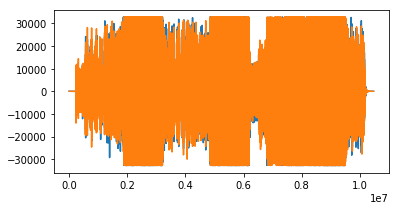

In [102]:
Main_Ui()